In [1]:
# import libraries
import pandas as pd
import numpy as np

In [18]:
filepath = "../csv/Topic_Survey_Assignment.csv"
df = pd.read_csv(filepath, index_col=0)
df

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

In [9]:
# import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
df.sort_values('Very interested', ascending=False, inplace=True)
df_frac = (df / 2233).round(2)
df_frac

Very interested  Somewhat interested  \
Data Analysis / Statistics             0.76                 0.20   
Machine Learning                       0.73                 0.21   
Data Visualization                     0.60                 0.33   
Big Data (Spark / Hadoop)              0.60                 0.33   
Deep Learning                          0.57                 0.34   
Data Journalism                        0.19                 0.48   

                            Not interested  
Data Analysis / Statistics            0.03  
Machine Learning                      0.03  
Data Visualization                    0.05  
Big Data (Spark / Hadoop)             0.06  
Deep Learning                         0.06  
Data Journalism                       0.27

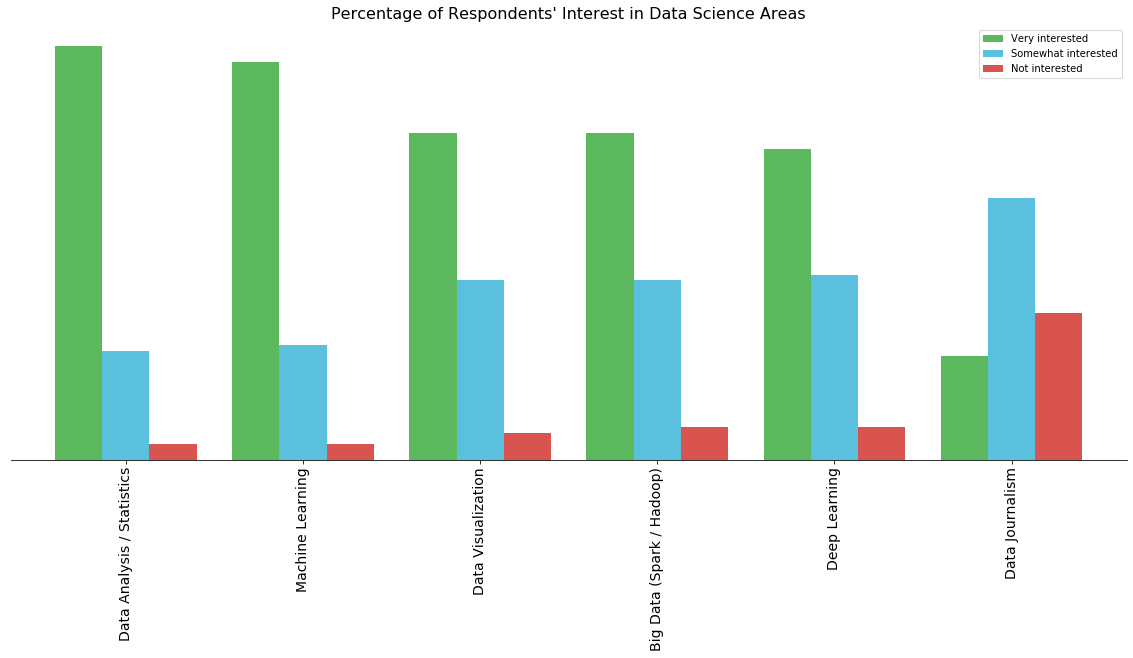

In [43]:
ax = df_frac.plot(kind='bar', width=0.8, figsize=(20,8), color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14, align='center')
plt.title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.yticks([])
plt.show()

In [61]:
filepath2 = "../csv/Police_Department_Incidents_-_Previous_Year__2016_.csv"
df2 = pd.read_csv(filepath2)

In [80]:
df2_sans = df2['PdDistrict'].value_counts().to_frame()
df2_nei = df2_sans.reset_index()
df2_nei.columns = ["Neighborhood", "Count"]
df2_nei

Neighborhood  Count
0     SOUTHERN  28445
1     NORTHERN  20100
2      MISSION  19503
3      CENTRAL  17666
4      BAYVIEW  14303
5    INGLESIDE  11594
6      TARAVAL  11325
7   TENDERLOIN   9942
8     RICHMOND   8922
9         PARK   8699

In [73]:
geofilepath = "../csv/san-francisco.geojson"
import sys
!{sys.executable} -m pip install folium

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_inter

In [103]:
import folium
print(folium.__file__)
print(folium.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\folium\__init__.py
0.10.1


In [32]:
df2_nei

Neighborhood  Count
0     SOUTHERN  28445
1     NORTHERN  20100
2      MISSION  19503
3      CENTRAL  17666
4      BAYVIEW  14303
5    INGLESIDE  11594
6      TARAVAL  11325
7   TENDERLOIN   9942
8     RICHMOND   8922
9         PARK   8699

In [35]:
geofilepath = r'https://cocl.us/sanfran_geojson/san-francisco.geo.json'
geofilepath = r"../csv/san-francisco.geojson"

threshold_scale = np.linspace(df2_nei['Count'].min(),
                              df2_nei['Count'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1

sans_map = folium.Map(location=[37.77, -122.42], 
                      zoom_start=12)

sans_map.choropleth(geo_data=geofilepath, 
                    data=df2_nei, 
                    key_on='feature.properties.DISTRICT',
                    columns=['Neighborhood', 'Count'],
                    fill_color='YlOrRd', 
                    fill_opacity=0.7, 
                    line_opacity=0.2,
                    threshold_scale=threshold_scale,
                    legend_name='crime rate in San Francisco'
)

sans_map

> NOTE: Mapbox Bright is no longer supported after folium version 0.10.1